In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544


[Text(0, 0.5, '# of Syntax Errors'),
 Text(0.5, 0, 'Coffee Consumption (mL)'),
 Text(0.5, 1.0, 'Students that drink more coffee tend to make more syntax errors')]

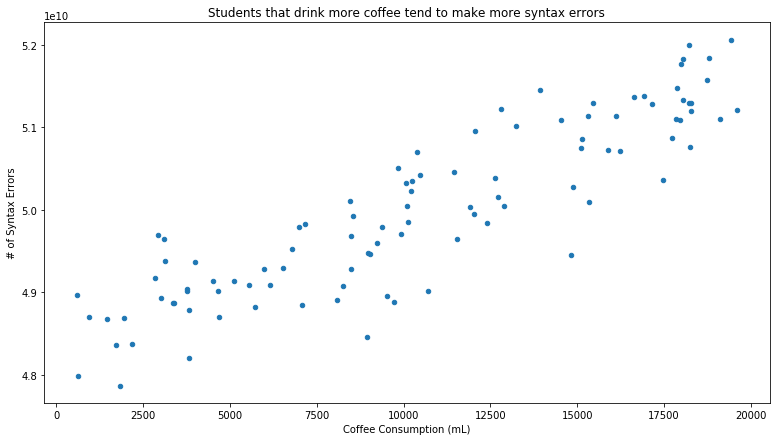

In [7]:
ax = df.plot.scatter(y='syntax_errors', x='ml_coffee', figsize=(13, 7))
ax.set(
    xlabel='Coffee Consumption (mL)',
    ylabel='# of Syntax Errors',
    title='Students that drink more coffee tend to make more syntax errors',
)

In [8]:
df.head()

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544


In [9]:
df['syntax_errors_billions'] = df.syntax_errors / 1_000_000_000
df['cups_coffee'] = df.ml_coffee / 30 / 8

[Text(0, 0.5, '# of Syntax Errors (billions)'),
 Text(0.5, 0, 'Coffee Consumption (cups)'),
 Text(0.5, 1.0, 'Students that drink more coffee tend to make more syntax errors')]

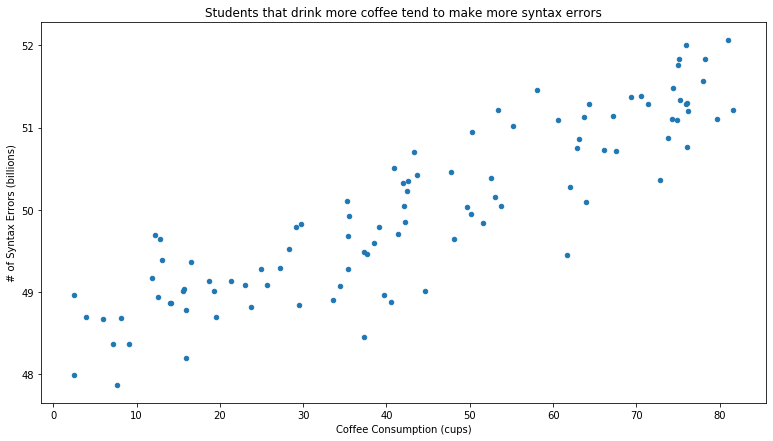

In [11]:
ax = df.plot.scatter(y='syntax_errors_billions', x='cups_coffee', figsize=(13, 7))
ax.set(
    xlabel='Coffee Consumption (cups)',
    ylabel='# of Syntax Errors (billions)',
    title='Students that drink more coffee tend to make more syntax errors',
)

In [29]:
def format_y_tick(tick_value, position):
    return '{:.0%}'.format(tick_value)

def format_x_tick(tick_value, position):
    return '{:,}'.format(int(tick_value))

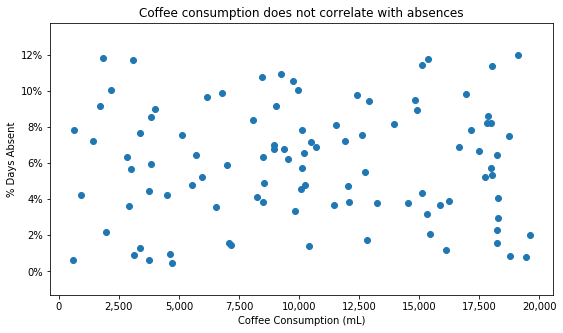

In [30]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.scatter(df.ml_coffee, df.p_days_absent)
ax.set(
    xlabel='Coffee Consumption (mL)',
    ylabel='% Days Absent',
    title='Coffee consumption does not correlate with absences',
)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_y_tick))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_x_tick))

How to handle number presentation on x and y axis:

- domain-based scaling: e.g. divide by 1,000,000,000 and label as "billions", e.g. mL -> cups
- A custom function + `mpl.ticker.FuncFormatter`
- `ax.get_xticks()` + `ax.set_xticks()`